In [ ]:
import tensorflow as tf
import os, os.path
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np

In [3]:
epoch=30

In [4]:
image_size=(48,48)

main_path = r"images_aug"

train_dataset = tf.keras.utils.image_dataset_from_directory(f"{main_path}/train",
labels="inferred",
label_mode="categorical",
color_mode="grayscale",
image_size=image_size,
shuffle=True
)

val_dataset=train_dataset = tf.keras.utils.image_dataset_from_directory(f"{main_path }/validation",
labels="inferred",
label_mode="categorical",
color_mode="grayscale",
image_size=image_size,
shuffle=True
)



Found 56321 files belonging to 7 classes.
Found 7066 files belonging to 7 classes.


In [5]:
def draw_chart(history,figname):
    
    fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epoch_range = range(len(loss))

    ax1.plot(epoch_range, loss, label="Training Loss",color='blue')
    ax1.plot(epoch_range, val_loss, label="Validation Loss",color='#3cbceb')
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")

    ax1.legend()
    
    ax1.grid(True)
    
    ax2.plot(epoch_range, accuracy, label="Training Accuracy",color='blue')
    ax2.plot(epoch_range, val_accuracy, label="Validation Accuracy",color='#3cbceb')
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")

    ax2.legend()
  
    ax2.grid(True)
    

In [38]:
def modeling(model,figname,train_data,valid_data,number_of_epochs):
   model.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),loss="categorical_crossentropy", metrics=["accuracy"])

   history = model.fit(train_data,validation_data=valid_data,epochs=number_of_epochs)

   draw_chart(history,figname)

   return model

# CONVOLUTIONAL NEURAL NETWORK MODELS TRAINING

## MODEL 1

Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 21s 89ms/step - accuracy: 0.2805 - loss: 2.2318 - val_accuracy: 0.3756 - val_loss: 1.6199
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 87ms/step - accuracy: 0.3827 - loss: 1.6138 - val_accuracy: 0.4458 - val_loss: 1.4783
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 19s 84ms/step - accuracy: 0.4492 - loss: 1.4486 - val_accuracy: 0.5215 - val_loss: 1.2794
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.5474 - loss: 1.2070 - val_accuracy: 0.5450 - val_loss: 1.2076
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.6622 - loss: 0.9263 - val_accuracy: 0.6407 - val_loss: 1.0027
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7727 - loss: 0.6462 - val_accuracy: 0.6991 - val_loss: 0.9178
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.8307 - loss: 0.4988 - val_accuracy: 0.7362 - val_loss: 0.8216
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.8842 - loss: 0.3539 - 

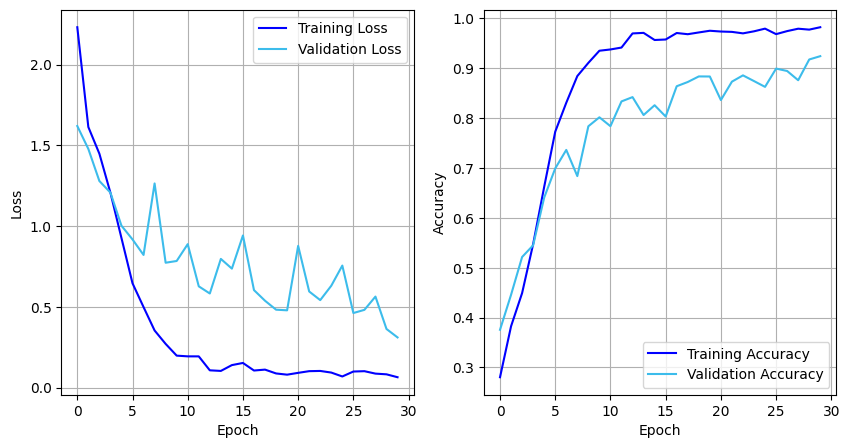

In [39]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model1 = modeling(model1,"model1.png",train_dataset,val_dataset,epoch)

## MODEL 2 BATCH NORMALIZATION

Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 28s 114ms/step - accuracy: 0.3163 - loss: 1.9876 - val_accuracy: 0.3998 - val_loss: 1.6420
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 25s 115ms/step - accuracy: 0.4210 - loss: 1.5026 - val_accuracy: 0.4799 - val_loss: 1.3817
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.4902 - loss: 1.3403 - val_accuracy: 0.2835 - val_loss: 2.0547
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.5763 - loss: 1.1281 - val_accuracy: 0.4740 - val_loss: 1.3723
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.6884 - loss: 0.8573 - val_accuracy: 0.6421 - val_loss: 0.9725
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 26s 118ms/step - accuracy: 0.7962 - loss: 0.5767 - val_accuracy: 0.7799 - val_loss: 0.6424
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.8817 - loss: 0.3559 - val_accuracy: 0.7838 - val_loss: 0.6138
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 26s 117ms/step - accuracy: 0.9299 - loss: 0

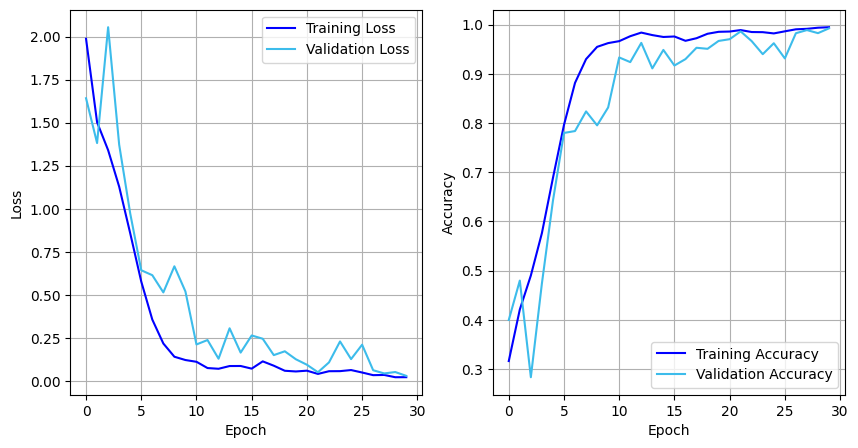

In [40]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model2 = modeling(model2,"model2.png",train_dataset,val_dataset,epoch)

## MODEL 3 - PADDING

Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - accuracy: 0.3402 - loss: 1.8148 - val_accuracy: 0.3224 - val_loss: 1.6998
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.4547 - loss: 1.4145 - val_accuracy: 0.5497 - val_loss: 1.1920
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 83ms/step - accuracy: 0.5507 - loss: 1.1841 - val_accuracy: 0.6141 - val_loss: 1.0677
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.6724 - loss: 0.8875 - val_accuracy: 0.6969 - val_loss: 0.8378
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.7928 - loss: 0.5790 - val_accuracy: 0.7369 - val_loss: 0.7649
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.8899 - loss: 0.3235 - val_accuracy: 0.8050 - val_loss: 0.5843
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9465 - loss: 0.1723 - val_accuracy: 0.8980 - val_loss: 0.3219
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 82ms/step - accuracy: 0.9614 - loss: 0.1261 - 

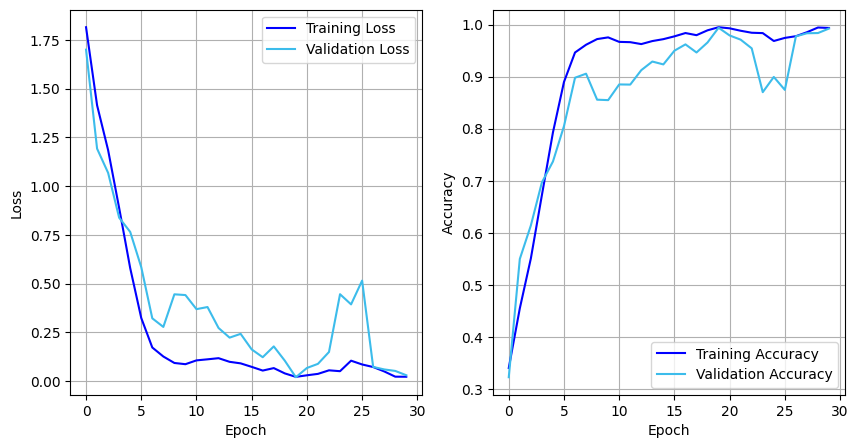

In [41]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model3 = modeling(model3,"model3.png",train_dataset,val_dataset,epoch)

## MODEL 4 - DIFFERENT KERNEL SIZE

Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 80ms/step - accuracy: 0.3380 - loss: 1.8298 - val_accuracy: 0.3648 - val_loss: 1.6769
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.4909 - loss: 1.3404 - val_accuracy: 0.5059 - val_loss: 1.3323
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.6494 - loss: 0.9561 - val_accuracy: 0.5348 - val_loss: 1.2927
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7976 - loss: 0.5858 - val_accuracy: 0.6759 - val_loss: 0.9474
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9048 - loss: 0.2951 - val_accuracy: 0.7942 - val_loss: 0.6063
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step - accuracy: 0.9512 - loss: 0.1549 - val_accuracy: 0.7068 - val_loss: 1.0784
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.9641 - loss: 0.1170 - val_accuracy: 0.7990 - val_loss: 0.6607
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 79ms/step - accuracy: 0.9748 - loss: 0.0790 - 

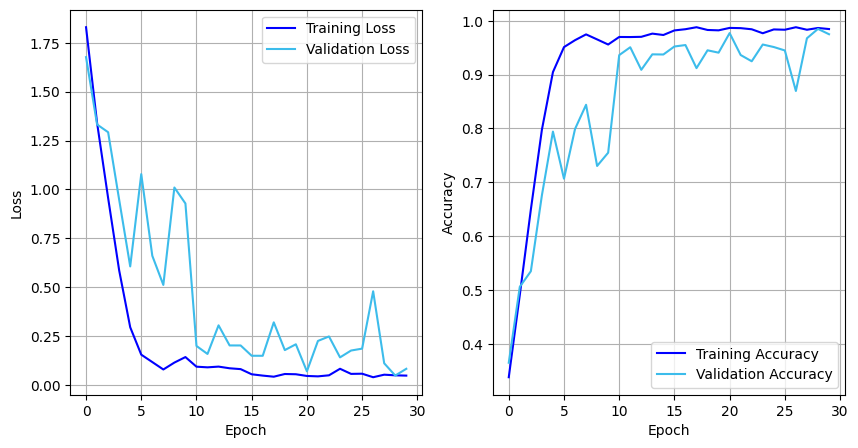

In [42]:
model4 = tf.keras.Sequential([
     tf.keras.layers.Input(shape=(48, 48,1)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(2, 2), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model4 = modeling(model4,"model4.png",train_dataset,val_dataset,epoch)

## MODEL 5 - MORE FILTERS

Epoch 1/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 47s 202ms/step - accuracy: 0.2934 - loss: 1.9658 - val_accuracy: 0.1898 - val_loss: 1.9234
Epoch 2/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 45s 202ms/step - accuracy: 0.3498 - loss: 1.6362 - val_accuracy: 0.3295 - val_loss: 1.7340
Epoch 3/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 44s 201ms/step - accuracy: 0.3980 - loss: 1.5432 - val_accuracy: 0.4172 - val_loss: 1.4622
Epoch 4/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 46s 208ms/step - accuracy: 0.4513 - loss: 1.4265 - val_accuracy: 0.5093 - val_loss: 1.3051
Epoch 5/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 45s 205ms/step - accuracy: 0.5021 - loss: 1.2989 - val_accuracy: 0.5303 - val_loss: 1.2713
Epoch 6/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 45s 205ms/step - accuracy: 0.5555 - loss: 1.1760 - val_accuracy: 0.6584 - val_loss: 0.9464
Epoch 7/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 45s 205ms/step - accuracy: 0.6118 - loss: 1.0188 - val_accuracy: 0.6397 - val_loss: 0.9852
Epoch 8/30
221/221 ━━━━━━━━━━━━━━━━━━━━ 45s 204ms/step - accuracy: 0.6732 - loss: 0

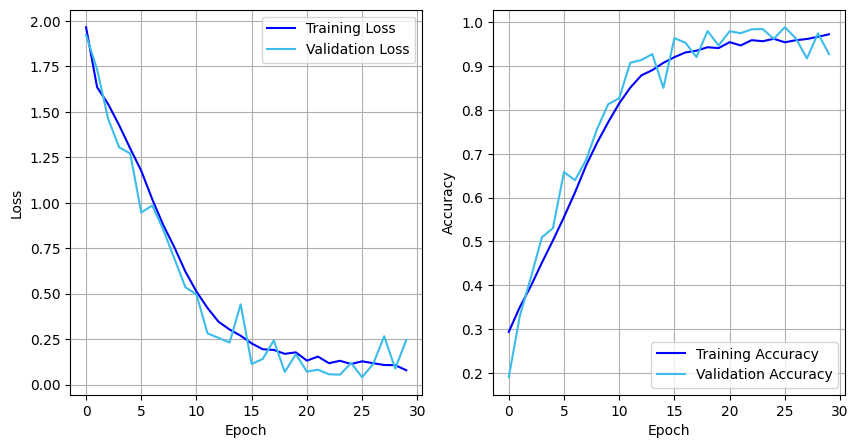

In [43]:
model7 = tf.keras.Sequential([
      tf.keras.layers.Input(shape=(48, 48,1)),

    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="valid", activation="relu"),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding="valid", activation="relu"),
   tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.4),

   

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(7, activation="softmax")
])

model7 = modeling(model7,"model7.png",train_dataset,val_dataset,epoch)